In [134]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
#import dataset
df = pd.read_csv('Salary_dataset.csv')

In [136]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [137]:
#dropping index column
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [138]:
#check missing data
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [139]:
#select x and y values
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [140]:
x

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [141]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 101)

In [142]:
x_train

array([ 9.6,  5.2,  9.1, 10.4,  4. ,  2.1,  1.4,  6.1,  8. ,  4.1,  3. ,
        4.6,  1.2,  7.2,  2.3,  3.3,  4.2,  3.8,  5. , 10.6,  8.3,  3.1,
        5.4,  4.1])

In [143]:
y_train

array([116970.,  66030., 105583., 122392.,  63219.,  43526.,  46206.,
        93941., 101303.,  56958.,  56643.,  61112.,  39344.,  98274.,
        39892.,  64446.,  57082.,  57190.,  67939., 121873., 113813.,
        60151.,  83089.,  55795.])

In [144]:
#build linear regression model
class linearReg:
  def __init__(self):
    self.m=None
    self.b=None

  def fit(self, x_train, y_train):
    num=0
    den=0

    for i in range(x_train.shape[0]):
      num=num+((x_train[i] - x_train.mean())*(y_train[i] - y_train.mean()))
      den=den+((x_train[i] - x_train.mean())*(x_train[i] - x_train.mean()))

    self.m=num/den
    self.b=y_train.mean() - (self.m * x_train.mean())
    print(self.m)
    print(self.b)

  def predict(self, x_test):
    return self.m * x_test + self.b

In [145]:
#fit the model into training set
lr=linearReg()
lr.fit(x_train,y_train)

9440.463833645093
25097.02127405641


In [146]:
#predict from test set
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([ 90236.22172621, 108173.10301013,  56250.55192509,  81739.80427593,
        40201.76340789, 116669.52046041])

In [147]:
#accuracy of model
from sklearn.metrics import mean_squared_error, r2_score
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2s_lr=r2_score(y_test,y_pred_lr)
print(mse_lr)
print(r2s_lr)

4934969.878489005
0.993422386435995


In [148]:
#build gradient descent model
class gradiantDescent:
  def __init__(self, lr, itr):
    self.m=0
    self.b=0
    self.lr=lr  #learning rate
    self.itr=itr  #number of iterations

  def fit(self, x_train, y_train):
    n=float(len(x_train))

    for i in range(self.itr):
      y_pred = self.m * x_train + self.b
      mcost = (2/n) * sum(x_train * (y_pred - y_train))
      bcost = (2/n) * sum(y_pred - y_train)

      self.m = self.m - mcost * self.lr
      self.b = self.b - bcost * self.lr

    print(self.m, self.b)

  def predict(self, x_test):
    return (self.m * x_test + self.b)

In [149]:
#fit the model into training set
gd=gradiantDescent(0.001,2000)
gd.fit(x_train,y_train)

10940.460380884888 15116.37453287254


In [150]:
#predict from test set
y_pred_gd=gd.predict(x_test)
y_pred_gd

array([ 90605.55116098, 111392.42588466,  51219.89378979,  80759.13681818,
        32621.11114229, 121238.84022746])

In [151]:
#accuracy of model
from sklearn.metrics import mean_squared_error, r2_score
mse_gd=mean_squared_error(y_test,y_pred_gd)
r2s_gd=r2_score(y_test,y_pred_gd)
print(mse_gd)
print(r2s_gd)

19338606.92719922
0.9742243850792757


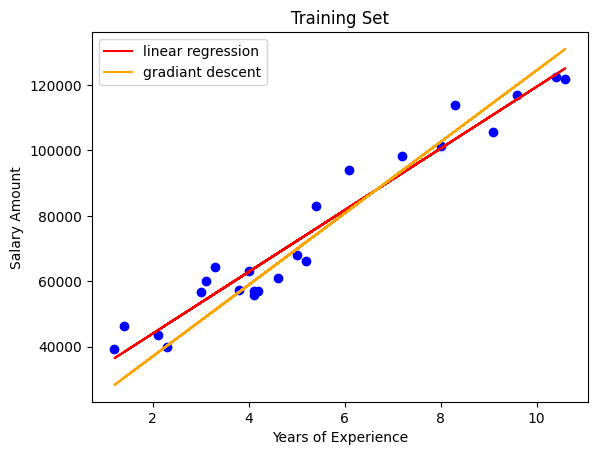

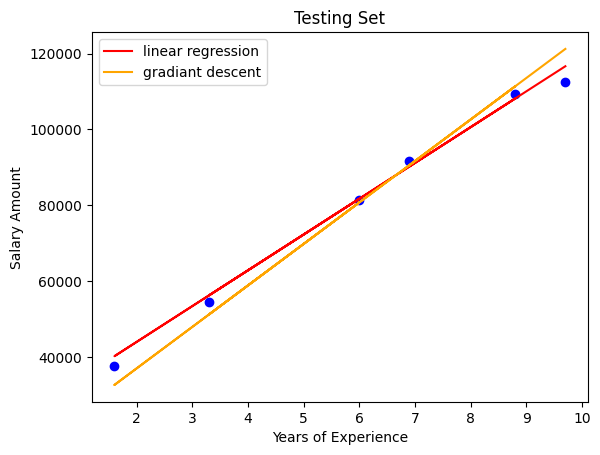

In [152]:
#visualize linear regression and gradiant descent models
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, lr.predict(x_train), color='red', label='linear regression')
plt.plot(x_train, gd.predict(x_train), color='orange', label='gradiant descent')
plt.title('Training Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Amount')
plt.legend()
plt.show()

plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, lr.predict(x_test), color='red', label='linear regression')
plt.plot(x_test, gd.predict(x_test), color='orange', label='gradiant descent')
plt.title('Testing Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Amount')
plt.legend()
plt.show()